# 앙상블 모형 (Random Forest)

- Voting 과 Bagging 분류모형 비교
  - Voting: 동일한 훈련 데이터, 다른 알고리즘
  - Bagging: 다른 훈련 데이터, 한가지 알고리즘

## 환경설정

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing # 전처리

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

from sklearn.ensemble import RandomForestRegressor

## 데이터셋

In [2]:
cancer_df = pd.read_csv('data/breast_cancer.csv')

# list(cancer_df.columns)
y = cancer_df[['diagnosis']]
X = cancer_df.loc[:, 'radius_mean':'fractal_dimension_worst']

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
y_train = np.ravel(y_train, order='C') # KNN : A column-vector y was passed when a 1d array was expected

C:\Users\statkclee\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 기계학습 - CV


In [3]:
clf_rf = RandomForestRegressor(n_estimators = 500, max_depth = 4, max_features = 3, bootstrap = True, random_state=777)

clf_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=3, n_estimators=500,
                      random_state=777)

## 예측 성능

In [4]:
y_pred = clf_rf.predict(X_test)
preds_1d = y_pred.flatten() # 차원 펴주기

pred_class = np.where(preds_1d > 0.63, 1 , 0) #0.5보다크면 1, 작으면 0
print('Random Forest Classifier: {:.3f}'.format(f1_score(y_test, pred_class)))

pred_class = np.where(preds_1d > 0.2, 1 , 0)  #0.2보다크면 1, 작으면 0
print('Random Forest Classifier: {:.3f}'.format(f1_score(y_test, pred_class)))

Random Forest Classifier: 0.923
Random Forest Classifier: 0.953


In [5]:
# cancer_df['diagnosis'].value_counts(normalize=True)
cancer_df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
y_pred_df = pd.DataFrame(y_pred, columns = ['probability'])
y_test_df = pd.DataFrame(y_test, columns = ['class'])
y_check_df = pd.concat([y_pred_df, y_test_df], axis = 1)
y_check_df.groupby(['class']).mean()

probability
class             
0         0.055662
1         0.855688

## 변수 중요도

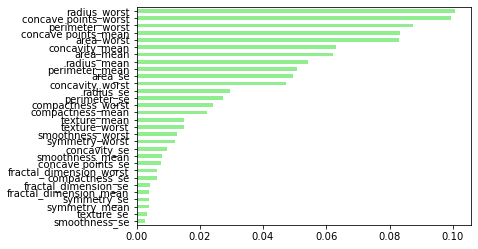

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

feat_imp = pd.Series(clf_rf.feature_importances_, index = X.columns)
feat_imp_sorted = feat_imp.sort_values()

feat_imp_sorted.plot(kind='barh', color='lightgreen')
plt.show()

# 번외
## cutoff 값 정하기

In [8]:
from sklearn.metrics import f1_score

def choose_cutoff(y_true, y_pred, metric=f1_score):
  best_cutoff = 0
  best_score = 0
  for cutoff in range(0, 100):
    y_pred_cutoff = (y_pred > cutoff/100).astype(int)
    score = metric(y_true, y_pred_cutoff)
    if score > best_score:
      best_cutoff = cutoff
      best_score = score
  return best_cutoff, best_score

# y_true = [0, 0, 1, 1]
# y_pred = [0.1, 0.3, 0.7, 0.9]
cutoff, score = choose_cutoff(y_test, y_pred)
print(f"Best cutoff: {cutoff/100}")
print(f"Best score: {score}")


Best cutoff: 0.2
Best score: 0.9534883720930233
